# Analysis of MEA demo 

## Load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from matplotlib.ticker import ScalarFormatter
from pathlib import Path
import re
import seaborn as sns
import scipy
from statannotations.Annotator import Annotator
import rushd as rd
import csv

In [5]:
figpath = '../figures/fig5/'
df_cortical = pd.read_excel(rd.datadir/'2023.11.17_MaxWellOne'/'231117'/'summary.xlsx')
df_iMNs = pd.read_excel(rd.datadir/'2023.11.17_MaxWellOne'/'231124'/'summary.xlsx')

df = pd.concat([df_cortical, df_iMNs]).reset_index()


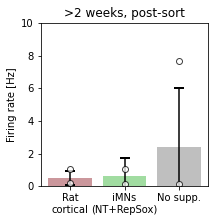

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

x = "Cond" 
y = "Firing rate [Hz]"

palette = {
    '22522_RatCortical': '#ab1e2d',
    '22730_NTR': 'limegreen',
    '22585_noNTR': 'grey'}
order = ['22522_RatCortical', '22730_NTR', '22585_noNTR']

sns.barplot(ax=ax, data=df,
    x=x, y=f'{y} mean',
    order=order,
    palette=palette, alpha=0.5)

# Add in error bars
x_coords = [p.get_x() + p.get_width() / 2 for p in ax.patches] # Get the x-coordinates of the bars
for index, row in df.iterrows():
    plt.errorbar(x=x_coords[index], y=row[f'{y} mean'], yerr=row[f'{y} std'],
        color='black', capsize=5, capthick=2)
    # Add 10th and 90th percentile
    plt.plot(x_coords[index], row[f'{y} P10'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)
    plt.plot(x_coords[index], row[f'{y} P90'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)

# Format
ax.set_ylim((0, 10))
ax.set_ylabel(y)
ax.set_xlabel('')
plt.title('>2 weeks, post-sort')

# plt.xticks(rotation=30)
label_map = {
    '22522_RatCortical': 'Rat\ncortical',
    '22730_NTR': 'iMNs\n(NT+RepSox)',
    '22585_noNTR': 'No supp.'}
ax.set_xticklabels([label_map[l] for l in order])

plt.savefig(figpath + f'{y}.svg', bbox_inches='tight')

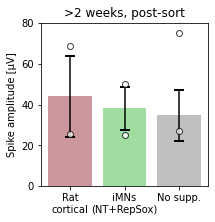

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

x = "Cond" 
y = "Spike amplitude [µV]"

palette = {
    '22522_RatCortical': '#ab1e2d',
    '22730_NTR': 'limegreen',
    '22585_noNTR': 'grey'}
order = ['22522_RatCortical', '22730_NTR', '22585_noNTR']

sns.barplot(ax=ax, data=df,
    x=x, y=f'{y} mean',
    order=order,
    palette=palette, alpha=0.5)

# Add in error bars
x_coords = [p.get_x() + p.get_width() / 2 for p in ax.patches] # Get the x-coordinates of the bars
for index, row in df.iterrows():
    plt.errorbar(x=x_coords[index], y=row[f'{y} mean'], yerr=row[f'{y} std'],
        color='black', capsize=5, capthick=2)
    # Add 10th and 90th percentile
    plt.plot(x_coords[index], row[f'{y} P10'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)
    plt.plot(x_coords[index], row[f'{y} P90'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)

# Format
ax.set_ylim((0, 80))
ax.set_yticks(np.arange(0, 81, 20))
ax.set_ylabel(y)
ax.set_xlabel('')
plt.title('>2 weeks, post-sort')

# plt.xticks(rotation=30)
ax.set_xticklabels([label_map[l] for l in order])

plt.savefig(figpath + f'{y}.svg', bbox_inches='tight')

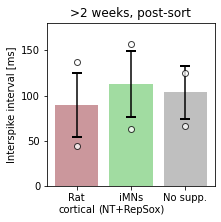

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

x = "Cond" 
y = "Interspike interval [ms]"

palette = {
    '22522_RatCortical': '#ab1e2d',
    '22730_NTR': 'limegreen',
    '22585_noNTR': 'grey'}
order = ['22522_RatCortical', '22730_NTR', '22585_noNTR']

sns.barplot(ax=ax, data=df,
    x=x, y=f'{y} mean',
    order=order,
    palette=palette, alpha=0.5)

# Add in error bars
x_coords = [p.get_x() + p.get_width() / 2 for p in ax.patches] # Get the x-coordinates of the bars
for index, row in df.iterrows():
    plt.errorbar(x=x_coords[index], y=row[f'{y} mean'], yerr=row[f'{y} std'],
        color='black', capsize=5, capthick=2)
    # Add 10th and 90th percentile
    plt.plot(x_coords[index], row[f'{y} P10'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)
    plt.plot(x_coords[index], row[f'{y} P90'], marker='o', linewidth=1, markeredgecolor='k', markerfacecolor='w', alpha=0.75,)

# Format
ax.set_ylim((0, 180))
ax.set_yticks(np.arange(0, 181, 50))
ax.set_ylabel(y)
ax.set_xlabel('')
plt.title('>2 weeks, post-sort')

# plt.xticks(rotation=30)
ax.set_xticklabels([label_map[l] for l in order])

plt.savefig(figpath + f'{y}.svg', bbox_inches='tight')